<a href="https://colab.research.google.com/github/EstevaoDev/Alura_ETL/blob/main/etl_alura_challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXTRAÇÃO

In [ ]:
import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print(df.head())
else:
    print(f"Erro ao acessar a API: {response.status_code}")

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

# TRANSFORMAÇÃO

In [ ]:
#Verificar colunas
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [ ]:
# Verificar primeiros registros
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

Colunas mais relevantes:
- churn – variável alvo
- tipo_contrato – contratos mensais tendem a ter mais evasão
- servico_internet e servico_streaming – podem indicar engajamento
- tempo_como_cliente – clientes novos costumam ter maior risco de churn
- valor_mensal – valores altos podem influenciar a decisão de sair
- pagamento_em_dia – inadimplência pode ser um sinal de risco


## Verificando Inconsistência:

In [ ]:
import pandas as pd

# 1. Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())
print("\nPorcentagem de valores ausentes:")
print((df.isnull().mean() * 100).round(2))

# 2. Verificando duplicatas — apenas nas colunas que não possuem dicionários
# Identifica colunas com pelo menos um valor tipo dict
colunas_com_dict = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]
# Usa somente colunas seguras para duplicata
colunas_validas = [col for col in df.columns if col not in colunas_com_dict]

print("\nNúmero de linhas duplicadas (ignorando colunas com dict):")
duplicatas = df.duplicated(subset=colunas_validas)
print(duplicatas.sum())
print("\nExibindo duplicatas, se houver:")
print(df[duplicatas])

# 3. Verificando tipos de dados
print("\nTipos de dados do DataFrame:")
print(df.dtypes)

# Exemplo de tratamento para colunas com números que possam ter sido lidos como texto:
# df['valor_total'] = pd.to_numeric(df['valor_total'], errors='coerce')

# 4. Verificando inconsistências em colunas categóricas
colunas_categoricas = ['phone', 'internet', 'account']

for coluna in colunas_categoricas:
    print(f"\nValores únicos na coluna '{coluna}':")
    print(df[coluna].value_counts(dropna=False))

Valores ausentes por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Porcentagem de valores ausentes:
customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64

Número de linhas duplicadas (ignorando colunas com dict):
0

Exibindo duplicatas, se houver:
Empty DataFrame
Columns: [customerID, Churn, customer, phone, internet, account]
Index: []

Tipos de dados do DataFrame:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores únicos na coluna 'phone':
phone
{'PhoneService': 'Yes', 'MultipleLines': 'No'}                 3495
{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}                3065
{'PhoneService': 'No', 'MultipleLines': 'No phone service'}     707
Name: count, dtype: int64

Valores únicos na coluna 'internet':
internet
{'InternetService': 'No', 'Onlin

## Tratando inconsistências:


In [ ]:
import pandas as pd

# 1. Expandindo os dicionários das colunas em colunas separadas
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df_charges = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))

# 2. Concatenando todos os dados tratados em um novo DataFrame
df_limpo = pd.concat([
    df.drop(columns=['phone', 'internet', 'account']),
    df_phone,
    df_internet,
    df_account,
    df_charges
], axis=1)

# 3. Padronizando os nomes das colunas para minúsculas e com underscore
df_limpo.columns = df_limpo.columns.str.lower().str.replace(' ', '_')

# 4. Convertendo colunas numéricas que estão como string
df_limpo['monthly'] = pd.to_numeric(df_limpo['monthly'], errors='coerce')
df_limpo['total'] = pd.to_numeric(df_limpo['total'], errors='coerce')

# 5. Padronizando categorias em minúsculo e sem espaços
colunas_categoricas = ['paymentmethod', 'contract', 'internetservice', 'phoneservice', 'multiplelines']
for col in colunas_categoricas:
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].str.lower().str.strip()

In [ ]:
# Criando a coluna 'contas_diarias' com base no valor mensal
df_limpo['contas_diarias'] = (df_limpo['monthly'] / 30).round(2)

print(df_limpo[['monthly', 'contas_diarias']].head())

   monthly  contas_diarias
0     65.6            2.19
1     59.9            2.00
2     73.9            2.46
3     98.0            3.27
4     83.9            2.80


## Padronização completa:

In [ ]:
# 1. Convertendo respostas binárias de texto para valores numéricos
binarias = ['paperlessbilling', 'phoneservice', 'multiplelines',
            'onlinesecurity', 'onlinebackup', 'deviceprotection',
            'techsupport', 'streamingtv', 'streamingmovies']

for col in binarias:
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].replace({'Yes': 1, 'No': 0,
                                               'no': 0, 'yes': 1,
                                               'Sim': 1, 'Não': 0,
                                               'no phone service': 0,
                                               'no internet service': 0})

# 2. Renomeando colunas para nomes mais intuitivos (exemplo)
df_limpo.rename(columns={
    'churn': 'evadiu',
    'contract': 'tipo_contrato',
    'paymentmethod': 'forma_pagamento',
    'monthly': 'valor_mensal',
    'total': 'valor_total'
}, inplace=True)

# 3. Padronizando valores categóricos (exemplo de tradução)
df_limpo['tipo_contrato'] = df_limpo['tipo_contrato'].replace({
    'month-to-month': 'mensal',
    'one year': 'anual',
    'two year': 'bienal'
})

df_limpo[col] = df_limpo[col].replace({
    'Yes': 1, 'No': 0,
    'yes': 1, 'no': 0,
    'Sim': 1, 'Não': 0,
    'no phone service': 0,
    'no internet service': 0
}).infer_objects(copy=False)

# ANÁLISE

In [ ]:
# 1. Estatísticas descritivas para colunas numéricas
print("\nEstatísticas numéricas gerais:")
print(df_limpo.describe().round(2))

# 2. Estatísticas descritivas incluindo colunas categóricas
print("\nEstatísticas completas (incluindo categóricas):")
print(df_limpo.describe(include='all'))

# 3. Estatísticas detalhadas para colunas selecionadas
colunas_analise = ['valor_mensal', 'valor_total', 'contas_diarias']

for coluna in colunas_analise:
    print(f"\nEstatísticas detalhadas da coluna '{coluna}':")
    print("Média:", round(df_limpo[coluna].mean(), 2))
    print("Mediana:", round(df_limpo[coluna].median(), 2))
    print("Desvio padrão:", round(df_limpo[coluna].std(), 2))
    print("Mínimo:", df_limpo[coluna].min())
    print("Máximo:", df_limpo[coluna].max())


Estatísticas numéricas gerais:
       phoneservice  multiplelines  paperlessbilling  charges.monthly  \
count        7267.0        7267.00           7267.00          7267.00   
mean            0.9           0.42              0.59            64.72   
std             0.3           0.49              0.49            30.13   
min             0.0           0.00              0.00            18.25   
25%             1.0           0.00              0.00            35.42   
50%             1.0           0.00              1.00            70.30   
75%             1.0           1.00              1.00            89.88   
max             1.0           1.00              1.00           118.75   

       valor_mensal  valor_total  contas_diarias  
count       7267.00      7256.00         7267.00  
mean          64.72      2280.63            2.16  
std           30.13      2268.63            1.00  
min           18.25        18.80            0.61  
25%           35.42       400.22            1.18  
50% 

## Distribuição da Evasão:

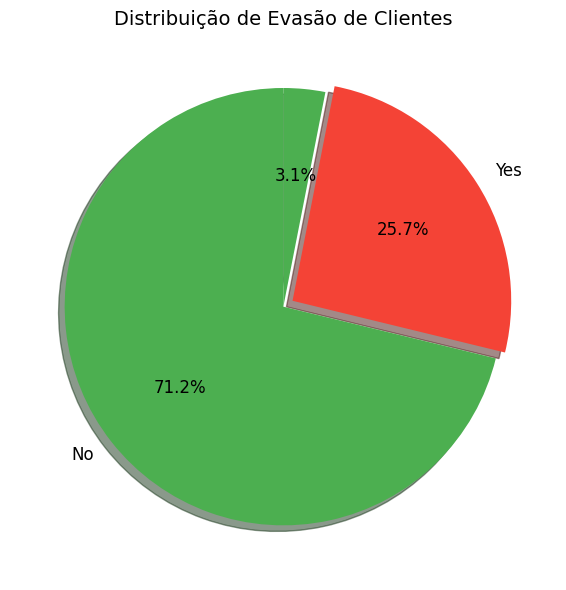

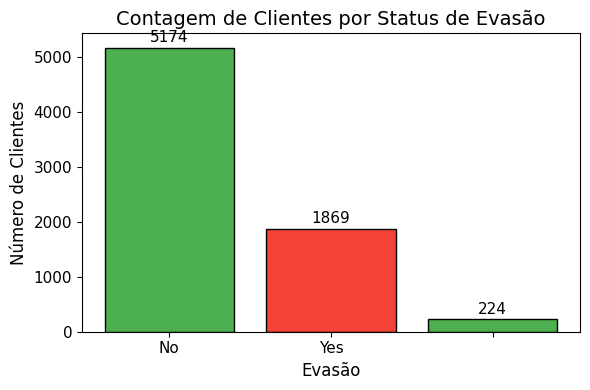

In [ ]:
import matplotlib.pyplot as plt

# Contagem de clientes por status de evasão
contagem = df_limpo['evadiu'].value_counts()
labels = contagem.index
valores = contagem.values
cores = ['#4caf50', '#f44336']  # verde para "Não", vermelho para "Sim"

# Gráfico de pizza com destaque e rótulos personalizados
plt.figure(figsize=(6, 6))
explode = [0.05 if label.lower() in ['yes', 'sim'] else 0 for label in labels]  # destaca evasão
plt.pie(valores,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=cores,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12})
plt.title('Distribuição de Evasão de Clientes', fontsize=14)
plt.tight_layout()
plt.show()

# Gráfico de barras com anotações e estilo limpo
plt.figure(figsize=(6, 4))
barras = plt.bar(labels, valores, color=cores, edgecolor='black')
plt.title('Contagem de Clientes por Status de Evasão', fontsize=14)
plt.xlabel('Evasão', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Adiciona rótulos nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2,
             altura + 50,
             f'{int(altura)}',
             ha='center',
             va='bottom',
             fontsize=11)

plt.tight_layout()
plt.show()

## Contagem de Evasão por Variáveis Categóricas:

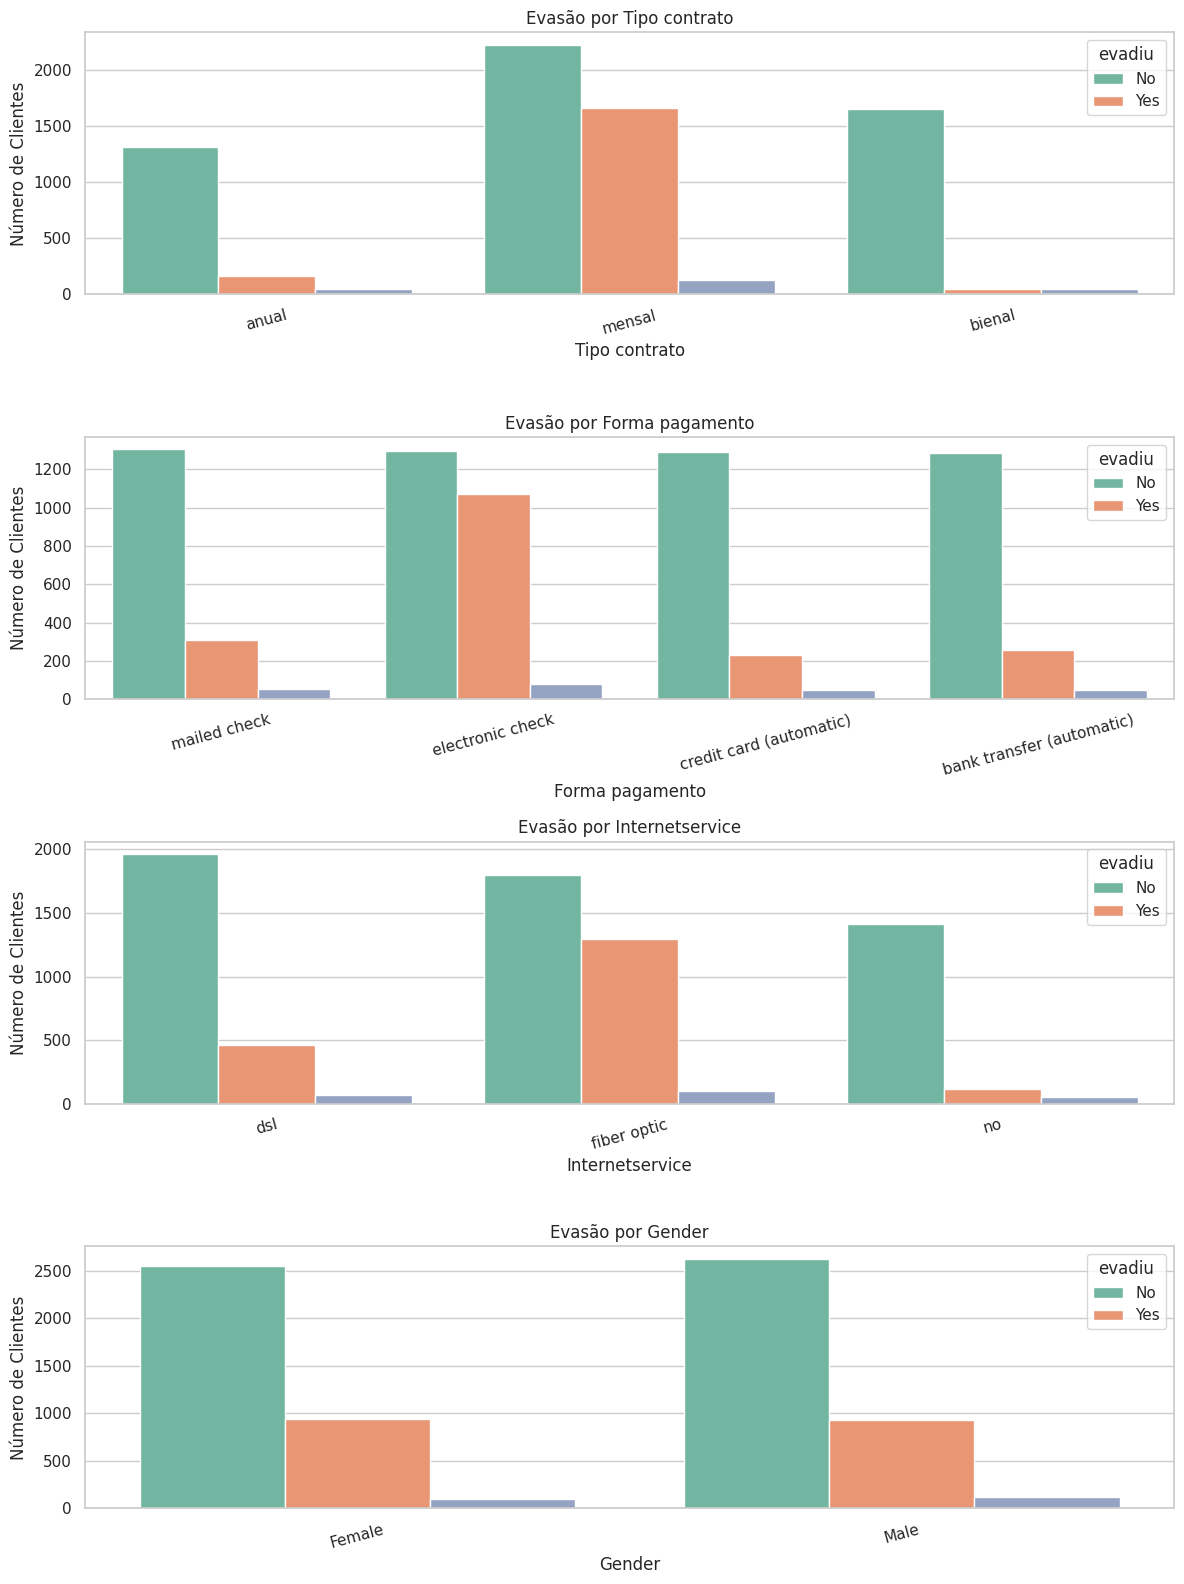

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis categóricas para cruzar com evasão
variaveis_categoricas = ['tipo_contrato', 'forma_pagamento', 'internetservice', 'gender']

# Ajuste o nome da coluna de gênero se estiver dentro do dicionário 'customer'
if 'gender' not in df_limpo.columns and 'customer' in df_limpo.columns:
    df_limpo['gender'] = df_limpo['customer'].apply(lambda x: x.get('gender') if isinstance(x, dict) else None)

# Configurações gerais de estilo
sns.set(style='whitegrid')
plt.figure(figsize=(12, 4 * len(variaveis_categoricas)))

# Geração dos gráficos
for i, var in enumerate(variaveis_categoricas, 1):
    plt.subplot(len(variaveis_categoricas), 1, i)
    sns.countplot(data=df_limpo, x=var, hue='evadiu', palette='Set2')
    plt.title(f'Evasão por {var.replace("_", " ").capitalize()}')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

## Contagem de Evasão por Variáveis Numéricas:

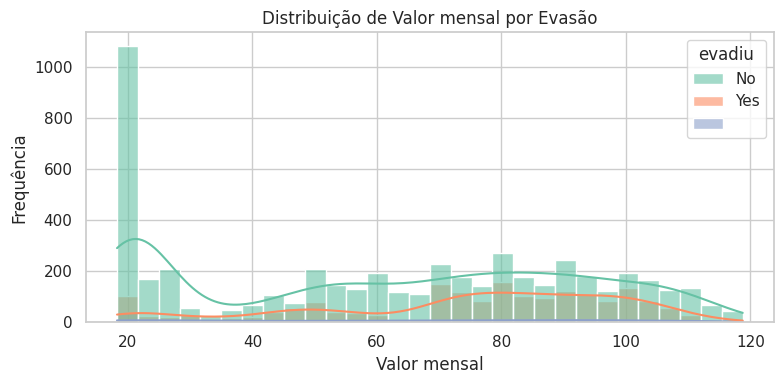

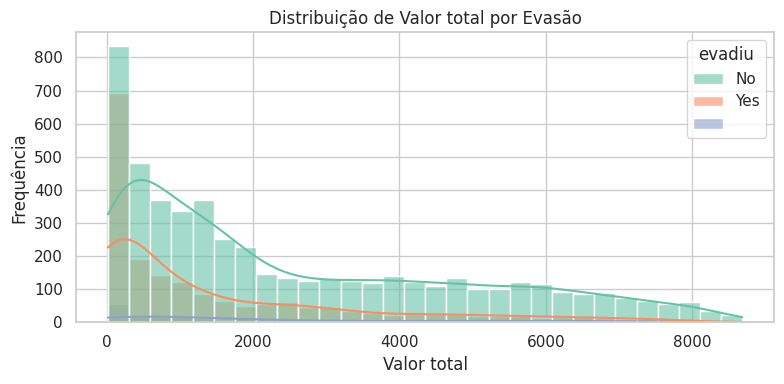

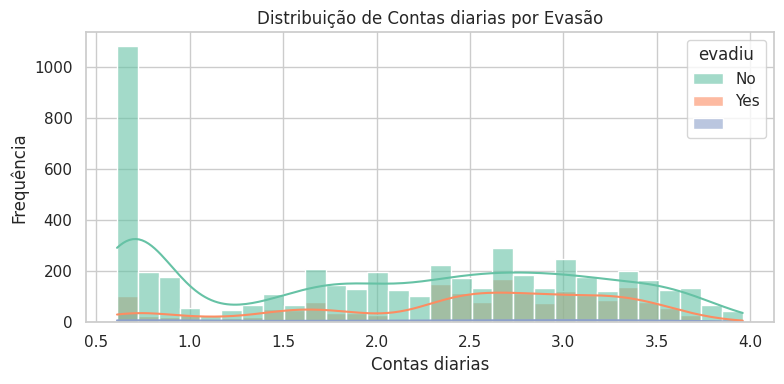

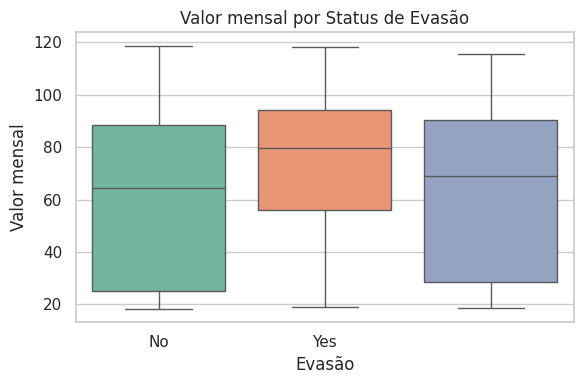

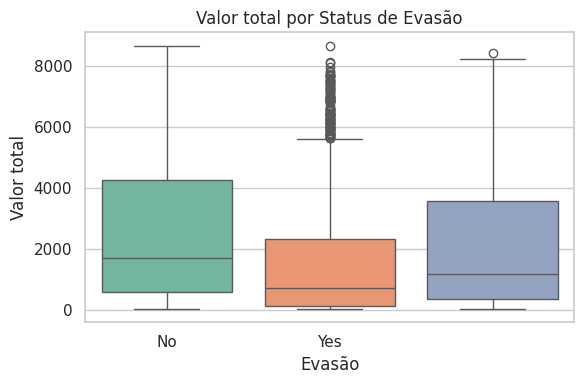

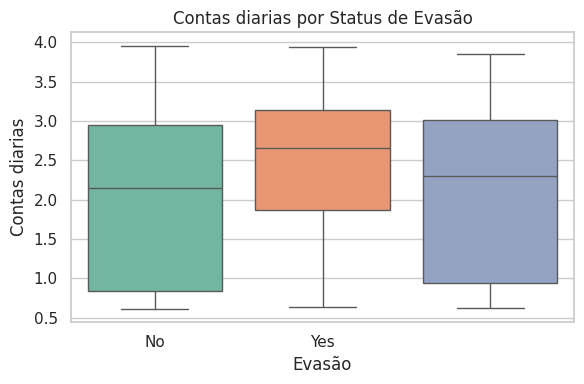

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis numéricas para análise
variaveis_numericas = ['valor_mensal', 'valor_total', 'contas_diarias']

# Histogramas com distribuição por evasão
for var in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_limpo, x=var, hue='evadiu', kde=True, bins=30, palette='Set2', alpha=0.6)
    plt.title(f'Distribuição de {var.replace("_", " ").capitalize()} por Evasão')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

# Boxplots com correção do aviso (hue igual a x e legenda desativada)
for var in variaveis_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_limpo, x='evadiu', y=var, hue='evadiu', palette='Set2', legend=False)
    plt.title(f'{var.replace("_", " ").capitalize()} por Status de Evasão')
    plt.xlabel('Evasão')
    plt.ylabel(var.replace("_", " ").capitalize())
    plt.tight_layout()
    plt.show()

# Relatório Final — Análise de Evasão de Clientes (Churn)

## Introdução

A evasão de clientes (churn) representa um dos principais desafios para empresas que operam em modelo de assinaturas ou prestação de serviços contínuos, como telecomunicações. O objetivo deste projeto é investigar o perfil dos clientes que cancelam seus serviços, identificar os fatores associados à evasão e propor estratégias baseadas em dados que auxiliem na retenção de clientes.

---

## Limpeza e Tratamento de Dados

Para garantir a qualidade da análise, as seguintes etapas foram executadas:

- Importação dos dados em formato JSON.
- Verificação de valores ausentes e linhas duplicadas (nenhuma anomalia encontrada).
- Expansão de colunas estruturadas como dicionários (`phone`, `internet`, `account`) usando `pd.json_normalize()`.
- Extração do subdicionário `Charges` em colunas separadas (`valor_mensal`, `valor_total`).
- Padronização de nomes de colunas (em minúsculas, com `_`).
- Conversão de colunas numéricas (strings → float64) com `pd.to_numeric()`.
- Criação da coluna `contas_diarias`, dividindo o valor mensal por 30.
- Padronização e transformação de colunas categóricas para o formato numérico (ex: `Sim/Não` → `1/0`).
- Tradução e renomeação de variáveis para facilitar a interpretação.

---

## Análise Exploratória de Dados (EDA)

### Evasão Geral

Gráficos de pizza e barras foram utilizados para visualizar a proporção de clientes que evadiram e os que permaneceram.

### Evasão por Variáveis Categóricas

Foi realizada a análise cruzada entre a variável de evasão (`evadiu`) e variáveis como:
- **Tipo de contrato**
- **Forma de pagamento**
- **Serviço de internet**
- **Gênero**

Gráficos de barras revelaram que clientes com contratos mensais e pagamento por boleto eletrônico têm maiores taxas de evasão.

### Evasão por Variáveis Numéricas

Distribuições de `valor_mensal`, `valor_total` e `contas_diarias` foram analisadas por meio de histogramas e boxplots. Identificou-se que:
- Clientes que evadiram, em geral, possuem menor valor total acumulado.
- O valor mensal é ligeiramente menor entre os que evadiram, mas com maior variabilidade.
- O padrão diário de cobrança também apresentou leve inclinação entre os grupos.

---

## Conclusões e Insights

- **Contratos mensais** têm relação direta com maior evasão, provavelmente por sua flexibilidade.
- Clientes que utilizam **pagamentos manuais**, como boleto eletrônico, evadem com mais frequência.
- **Baixo valor total** gasto sugere evasão precoce — clientes que cancelam nos primeiros meses.
- **Evasão não depende exclusivamente do valor mensal**, mas de um conjunto de fatores contratuais e de envolvimento.

---

## Recomendações

Com base nos insights extraídos, as seguintes ações são recomendadas:

- **Incentivar contratos mais longos** (anual, bienal) oferecendo descontos ou bônus.
- **Promover formas de pagamento automáticas** com benefícios adicionais.
- **Criar um programa de onboarding e retenção** para clientes nos primeiros 90 dias.
- **Construir um modelo preditivo de churn** com as variáveis analisadas, permitindo ações proativas de retenção com base em risco estimado.

---

Este relatório fornece subsídios valiosos para decisões estratégicas orientadas por dados, com potencial direto na redução da taxa de churn e no aumento do valor do ciclo de vida do cliente.



# Relatório Final — Análise de Evasão de Clientes (Churn)

## Introdução

A evasão de clientes (churn) representa um dos principais desafios para empresas que operam em modelo de assinaturas ou prestação de serviços contínuos, como telecomunicações. O objetivo deste projeto é investigar o perfil dos clientes que cancelam seus serviços, identificar os fatores associados à evasão e propor estratégias baseadas em dados que auxiliem na retenção de clientes.

---

## Limpeza e Tratamento de Dados

Para garantir a qualidade da análise, as seguintes etapas foram executadas:

- Importação dos dados em formato JSON.
- Verificação de valores ausentes e linhas duplicadas (nenhuma anomalia encontrada).
- Expansão de colunas estruturadas como dicionários (`phone`, `internet`, `account`) usando `pd.json_normalize()`.
- Extração do subdicionário `Charges` em colunas separadas (`valor_mensal`, `valor_total`).
- Padronização de nomes de colunas (em minúsculas, com `_`).
- Conversão de colunas numéricas (strings → float64) com `pd.to_numeric()`.
- Criação da coluna `contas_diarias`, dividindo o valor mensal por 30.
- Padronização e transformação de colunas categóricas para o formato numérico (ex: `Sim/Não` → `1/0`).
- Tradução e renomeação de variáveis para facilitar a interpretação.

---

## Análise Exploratória de Dados (EDA)

### Evasão Geral


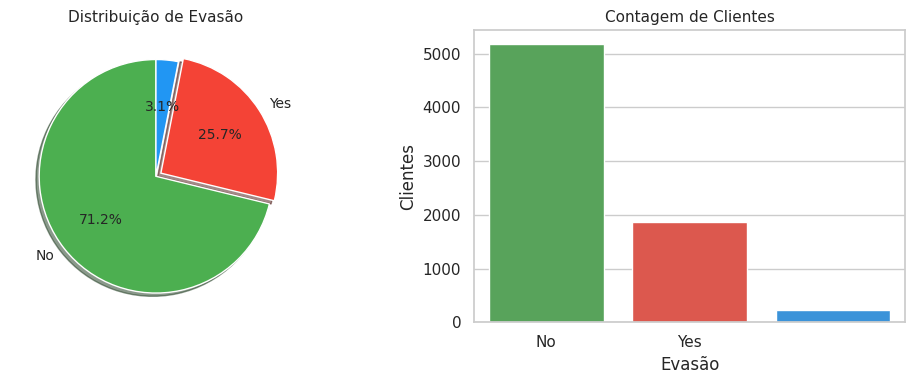

### Evasão por Variáveis Categóricas

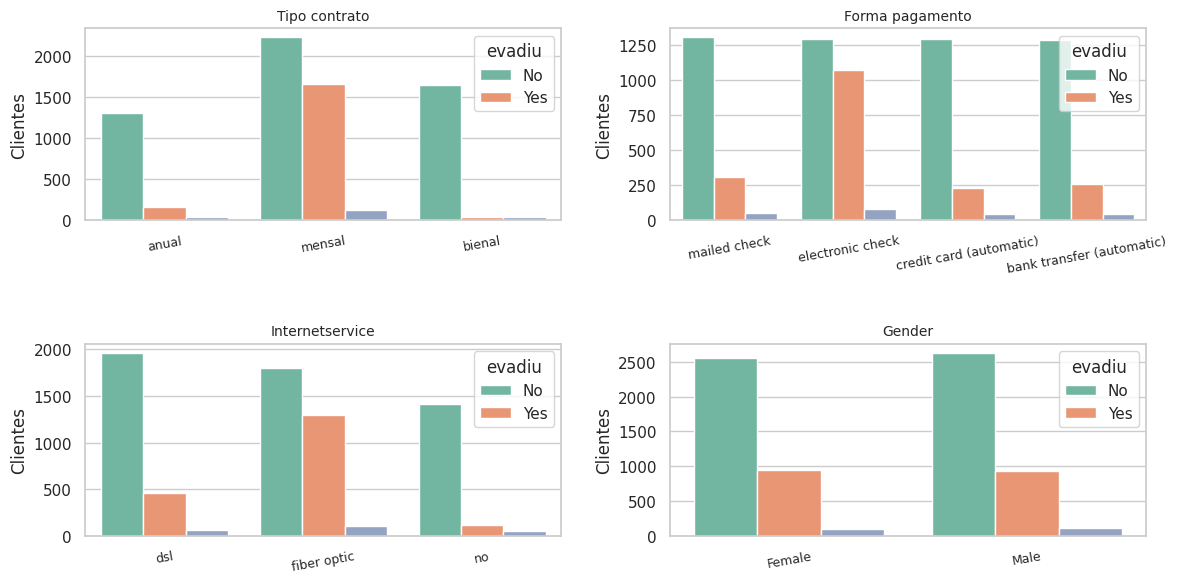

### Evasão por Variáveis Numéricas

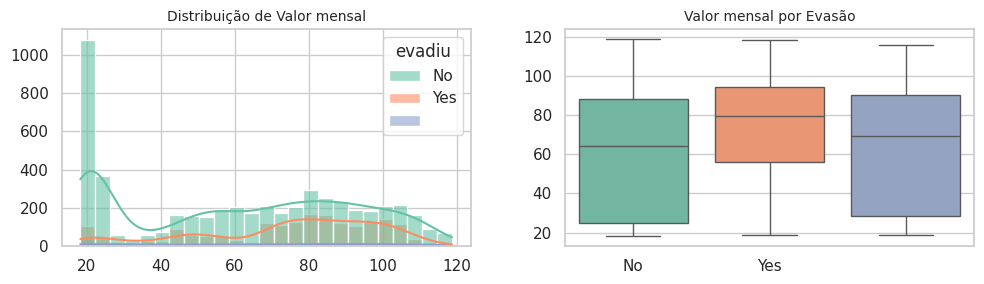

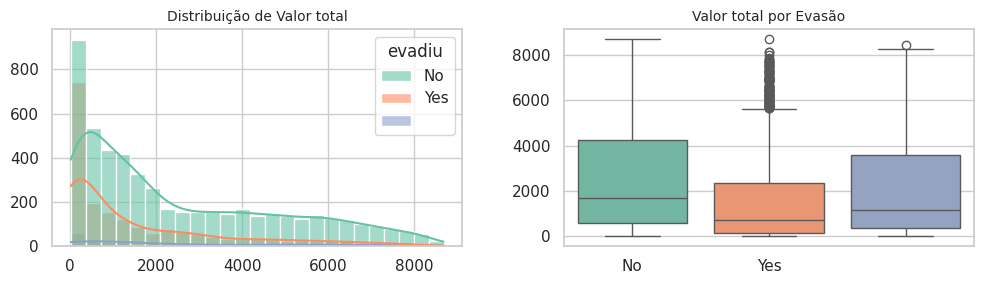

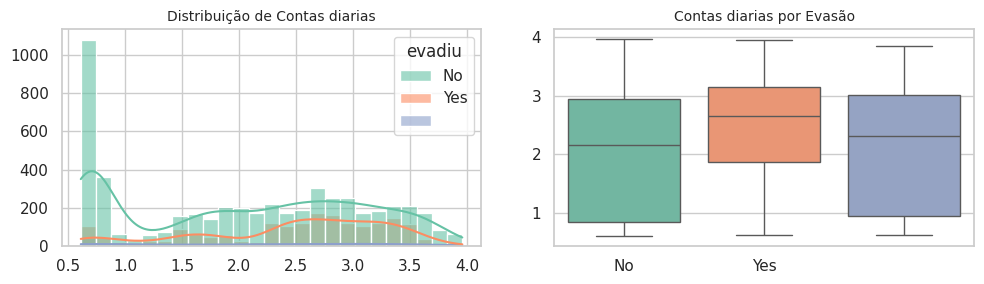


---

## Conclusões e Insights

- **Contratos mensais** têm relação direta com maior evasão, provavelmente por sua flexibilidade.
- Clientes que utilizam **pagamentos manuais**, como boleto eletrônico, evadem com mais frequência.
- **Baixo valor total** gasto sugere evasão precoce — clientes que cancelam nos primeiros meses.
- **Evasão não depende exclusivamente do valor mensal**, mas de um conjunto de fatores contratuais e de envolvimento.

---

## Recomendações

Com base nos insights extraídos, as seguintes ações são recomendadas:

- **Incentivar contratos mais longos** (anual, bienal) oferecendo descontos ou bônus.
- **Promover formas de pagamento automáticas** com benefícios adicionais.
- **Criar um programa de onboarding e retenção** para clientes nos primeiros 90 dias.
- **Construir um modelo preditivo de churn** com as variáveis analisadas, permitindo ações proativas de retenção com base em risco estimado.

---

Este relatório fornece subsídios valiosos para decisões estratégicas orientadas por dados, com potencial direto na redução da taxa de churn e no aumento do valor do ciclo de vida do cliente.


In [ ]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
sns.set(style='whitegrid')
categorias_unicas = df_limpo['evadiu'].nunique()
cores = ['#4caf50', '#f44336', '#2196f3'][:categorias_unicas]

# MARKDOWN: Relatório principal
markdown = """
# Relatório Final — Análise de Evasão de Clientes (Churn)

## Introdução

A evasão de clientes (churn) representa um dos principais desafios para empresas que operam em modelo de assinaturas ou prestação de serviços contínuos, como telecomunicações. O objetivo deste projeto é investigar o perfil dos clientes que cancelam seus serviços, identificar os fatores associados à evasão e propor estratégias baseadas em dados que auxiliem na retenção de clientes.

---

## Limpeza e Tratamento de Dados

Para garantir a qualidade da análise, as seguintes etapas foram executadas:

- Importação dos dados em formato JSON.
- Verificação de valores ausentes e linhas duplicadas (nenhuma anomalia encontrada).
- Expansão de colunas estruturadas como dicionários (`phone`, `internet`, `account`) usando `pd.json_normalize()`.
- Extração do subdicionário `Charges` em colunas separadas (`valor_mensal`, `valor_total`).
- Padronização de nomes de colunas (em minúsculas, com `_`).
- Conversão de colunas numéricas (strings → float64) com `pd.to_numeric()`.
- Criação da coluna `contas_diarias`, dividindo o valor mensal por 30.
- Padronização e transformação de colunas categóricas para o formato numérico (ex: `Sim/Não` → `1/0`).
- Tradução e renomeação de variáveis para facilitar a interpretação.

---

## Análise Exploratória de Dados (EDA)

### Evasão Geral
"""
display(Markdown(markdown))

# Gráfico de pizza e barras — lado a lado
contagem = df_limpo['evadiu'].value_counts()
explode = [0.05 if str(i).lower() in ['sim', 'yes'] else 0 for i in contagem.index]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].pie(contagem, labels=contagem.index, autopct='%1.1f%%', colors=cores,
           explode=explode, startangle=90, shadow=True, textprops={'fontsize': 10})
axs[0].set_title('Distribuição de Evasão', fontsize=11)

sns.countplot(data=df_limpo, x='evadiu', hue='evadiu', palette=cores, legend=False, ax=axs[1])
axs[1].set_title('Contagem de Clientes', fontsize=11)
axs[1].set_xlabel('Evasão')
axs[1].set_ylabel('Clientes')

plt.tight_layout(w_pad=3)
plt.show()

display(Markdown("### Evasão por Variáveis Categóricas"))

# Gráficos categóricos: 2 colunas
variaveis_categoricas = ['tipo_contrato', 'forma_pagamento', 'internetservice', 'gender']
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for ax, var in zip(axs.flat, variaveis_categoricas):
    sns.countplot(data=df_limpo, x=var, hue='evadiu', palette='Set2', ax=ax)
    ax.set_title(f'{var.replace("_", " ").capitalize()}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Clientes')
    ax.tick_params(axis='x', rotation=10, labelsize=9)

plt.tight_layout(h_pad=3, w_pad=2)
plt.show()

display(Markdown("### Evasão por Variáveis Numéricas"))

# Gráficos numéricos: histograma e boxplot por variável
variaveis_numericas = ['valor_mensal', 'valor_total', 'contas_diarias']
for var in variaveis_numericas:
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(data=df_limpo, x=var, hue='evadiu', kde=True, bins=25,
                 palette='Set2', alpha=0.6, ax=axs[0])
    axs[0].set_title(f'Distribuição de {var.replace("_", " ").capitalize()}', fontsize=10)
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')

    sns.boxplot(data=df_limpo, x='evadiu', y=var, hue='evadiu',
                palette='Set2', legend=False, ax=axs[1])
    axs[1].set_title(f'{var.replace("_", " ").capitalize()} por Evasão', fontsize=10)
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')

    plt.tight_layout(w_pad=3)
    plt.show()

# MARKDOWN final
display(Markdown("""
---

## Conclusões e Insights

- **Contratos mensais** têm relação direta com maior evasão, provavelmente por sua flexibilidade.
- Clientes que utilizam **pagamentos manuais**, como boleto eletrônico, evadem com mais frequência.
- **Baixo valor total** gasto sugere evasão precoce — clientes que cancelam nos primeiros meses.
- **Evasão não depende exclusivamente do valor mensal**, mas de um conjunto de fatores contratuais e de envolvimento.

---

## Recomendações

Com base nos insights extraídos, as seguintes ações são recomendadas:

- **Incentivar contratos mais longos** (anual, bienal) oferecendo descontos ou bônus.
- **Promover formas de pagamento automáticas** com benefícios adicionais.
- **Criar um programa de onboarding e retenção** para clientes nos primeiros 90 dias.
- **Construir um modelo preditivo de churn** com as variáveis analisadas, permitindo ações proativas de retenção com base em risco estimado.

---

Este relatório fornece subsídios valiosos para decisões estratégicas orientadas por dados, com potencial direto na redução da taxa de churn e no aumento do valor do ciclo de vida do cliente.
"""))

In [4]:
# Navega para a pasta correta
%cd /content/Alura_ETL/Alura_ETL

# Renomeia o notebook que foi duplicado para o nome padrão
!mv etl_alura_challenge_\(1\).ipynb etl_alura_challenge.ipynb

# Configura seu nome e email do Git
!git config user.name "EstevaoDev"
!git config user.email "estevaodev.mmm@gmail.com"

# Move o notebook um nível acima (para a raiz do repositório)
!mv etl_alura_challenge.ipynb ../
%cd ..

# Adiciona e faz o commit
!git add etl_alura_challenge.ipynb
!git commit -m "Adiciona notebook etl_alura_challenge renomeado via Colab"

# Cria a branch main se necessário
!git branch -M main

# Faz o push para o repositório (substitua pelo seu token pessoal)
!git push https://<SEU_TOKEN_AQUI>@github.com/EstevaoDev/Alura_ETL.git main

/content/Alura_ETL/Alura_ETL
/content/Alura_ETL
[main 46dc8f9] Adiciona notebook etl_alura_challenge renomeado via Colab
 1 file changed, 1213 insertions(+)
 create mode 100644 etl_alura_challenge.ipynb
/bin/bash: line 1: SEU_TOKEN_AQUI: No such file or directory
